
<div style="color:white;
           display:fill;
           border-radius:20px;
           background-color:#F5DEB3;
           font-size:170%;
           font-family:Helvetica, Sans-Serif;
           letter-spacing:0.5px">
<p style="padding: 10px;
          text-align: center;
          font-size:150%;
          color:blue;">
          👔Synthetic_Images_with_DCGANs👔
            
</p>
<style>
        h1{text-align: center;}
</style>  
    
</div>

<p style="font-family:cursive; font-size:15px; color:'darkcyan';">I brewed this notebook from scratch, If this notebook helped, please consider upvoting and cite me if sharing ,Thank you!</p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://www.linkedin.com/in/tusharaggarwalinseec/" target="_blank">Lets connect on LinkedIn!</a>
    
   </p>
<p style="width: 250px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
<a href="https://github.com/tushar2704" target="_blank">Follow me on Github too!</a> </p>
<p style="width:270px;padding: 15px;background: papayawhip;border-radius:10px;font-size:15px;border-radius:20px">
    <a href="https://medium.com/@tushar_aggarwal" target="_blank">Also checkout my Medium posts!</a>
    
</p>


<div class="alert alert-info" role="alert" style="font-size:17px;border-radius:20px">
    <b>In this Project, I am building a model that predict the health insurance cost incurred by individuals based on theit age, gender, BMI, number of Children, smoking habits and geolocation </b>
  </div>

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    <b>👔Synthetic_Images_with_DCGANs👔</b>
</p>
   <p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:17px;border-radius:20px"> 
    <b>Some thing to Note:</b><br>
    <br><br><b>1. </b><b>Features descriptions:</b>
 <br><u>sex</u>: insurance contractor gender.
<br><u>bmi</u>: body mass index(ideally 18.5 to 24.9).
<br><u>children</u>: number of children covered by health insurance/number of dependents.
<br><u>smoking</u>: smoking habits.
<br><u>region</u>: the benificiary's residential area in the U.S.. 
  <br><u>Target(output)-charges</u>: individual's medical cost billed by health insurer.
</p>


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Importing the required Liabraries
</p>

In [6]:
!pip install plot_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 2.5 MB/s eta 0:00:0000:0100:01


In [7]:
#Data manipulation imports
import numpy as np
import pandas as pd

#Data Visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Modeling imports
import tensorflow as tf
from tensorflow import keras
import plot_utils
from tqdm import tqdm


#Additional imports
from math import *
from IPython import display
print("Tensorflow Verison: ",tf.__version__)

Tensorflow Verison:  2.11.0


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Loading and preprocessing the data
</p>

In [8]:
#Loading datasest
(X_train, y_train), (X_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [9]:
#Normalizing the images
X_train=X_train.astype(np.float32) / 255.0
X_test=X_test.astype(np.float32) / 255.0


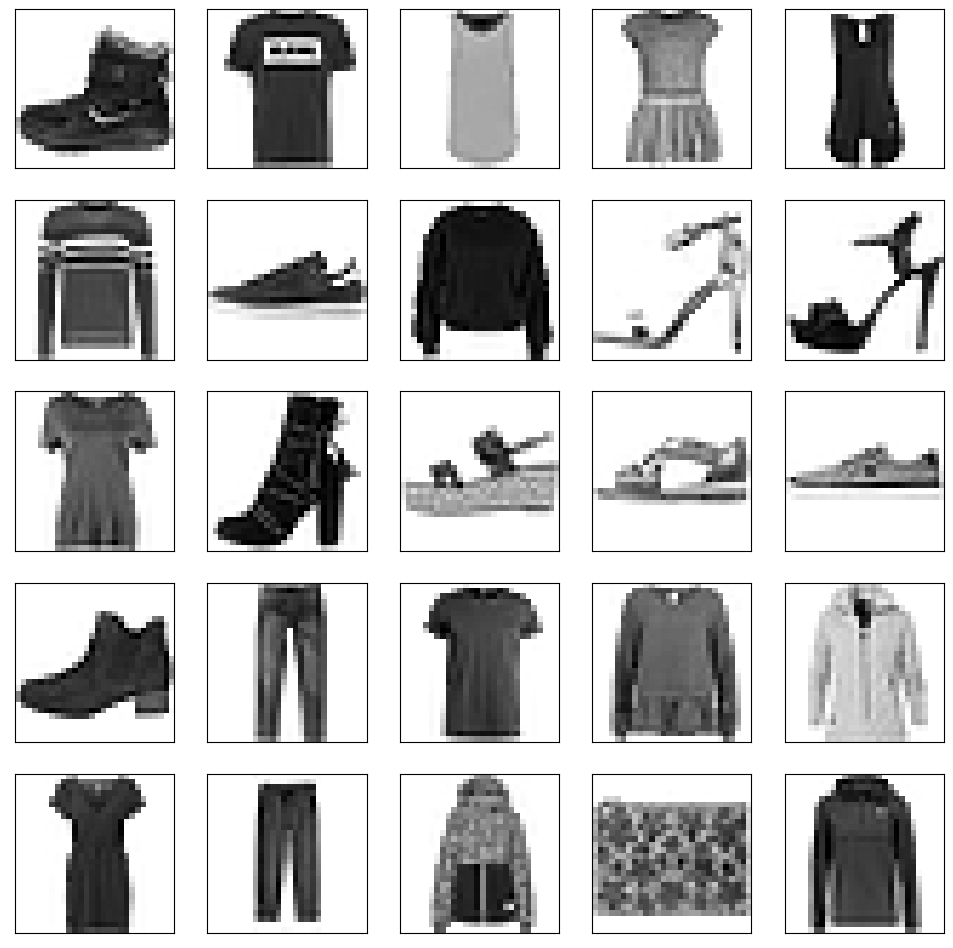

In [10]:
#Checking random images
plt.figure(figsize=(12,12))

for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)

plt.show()

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Batching and Shuffling of training data
</p>

In [11]:
#Setting batch_size
batch_size = 32

#Creating dataset
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
#Combining into batches
dataset=dataset.batch(batch_size, drop_remainder=True).prefetch(1)


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Generator for DCGANs
</p>

In [36]:
num_features = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[num_features]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, (5,5), (2,2), padding="same", activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, (5,5), (2,2), padding="same", activation="tanh"),
])


In [37]:
import numpy as np
import matplotlib.pyplot as plt

def show(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

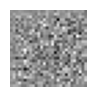

In [38]:
#Creating seed
noise = tf.random.normal(shape=[1, num_features])

generated_image = generator(noise, training=False)

#
show(generated_image,1)

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Discriminator network for DCGAN
</p>

In [39]:
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, (5,5), (2,2), padding='same', input_shape=[28,28,1]),
    keras.layers.LeakyReLU(0.2),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(128, (5,5), (2,2), padding='same'),
    keras.layers.LeakyReLU(0.2),
    keras.layers.Dropout(0.3),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [40]:
#Checking decision
decision =discriminator(generated_image)
print(decision)

tf.Tensor([[0.4997954]], shape=(1, 1), dtype=float32)


<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Compiling DCGAN
</p>

In [41]:
discriminator.compile(loss='binary_crossentropy', optimizer='rmsprop')
discriminator.trainable=False
gan = keras.models.Sequential([
    generator,
    discriminator
])
gan.compile(loss='binary_crossentropy', optimizer='rmsprop')

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Training Procedure
</p>

In [42]:
#Seed of random
seed= tf.random.normal(shape=[batch_size, 100])

In [43]:
from tqdm import tqdm
def train_dcgan(gan, dataset, batch_size, num_features, epochs=5):
    generator, discriminator = gan.layers
    for epoch in tqdm(range(epochs)):
        print("Epoch {}/{}".format(epoch + 1, epochs))
        for X_batch in dataset:
            noise = tf.random.normal(shape=[batch_size, num_features])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            noise = tf.random.normal(shape=[batch_size, num_features])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
            # Produce images for the GIF as we go
        display.clear_output(wait=True)
        generate_and_save_images(generator, epoch + 1, seed)
        
    display.clear_output(wait=True)
    generate_and_save_images(generator, epochs, seed)

In [44]:
## Source https://www.tensorflow.org/tutorials/generative/dcgan#create_a_gif
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(10,10))

  for i in range(25):
      plt.subplot(5, 5, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='binary')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Train DCGAN
</p>

In [45]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1.

In [46]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

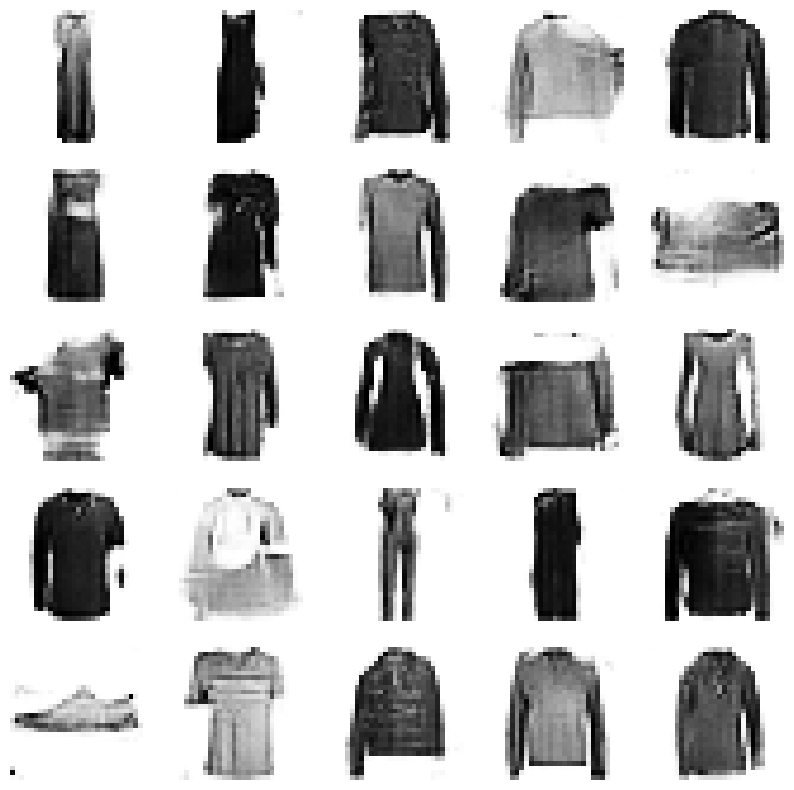

CPU times: user 7min 47s, sys: 21 s, total: 8min 8s
Wall time: 7min 43s


In [47]:
%%time
train_dcgan(gan, dataset, batch_size, num_features, epochs=10)

<p style="width: 1000px;padding: 20px;background: papayawhip;border-radius:10px;font-size:25px;border-radius:20px">
    Generate Synthetic Images with DCGAN
</p>

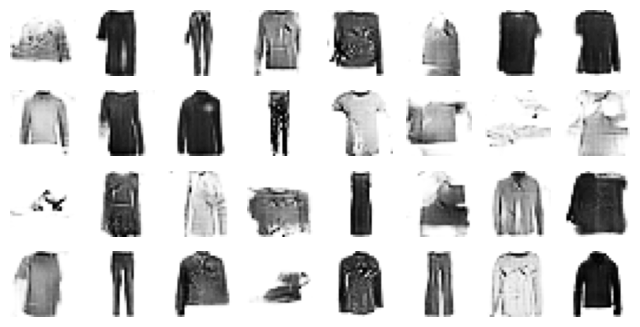

In [49]:
noise = tf.random.normal(shape=[batch_size, num_features])
generated_images = generator(noise)
show(generated_images, 8)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  app.launch_new_instance()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


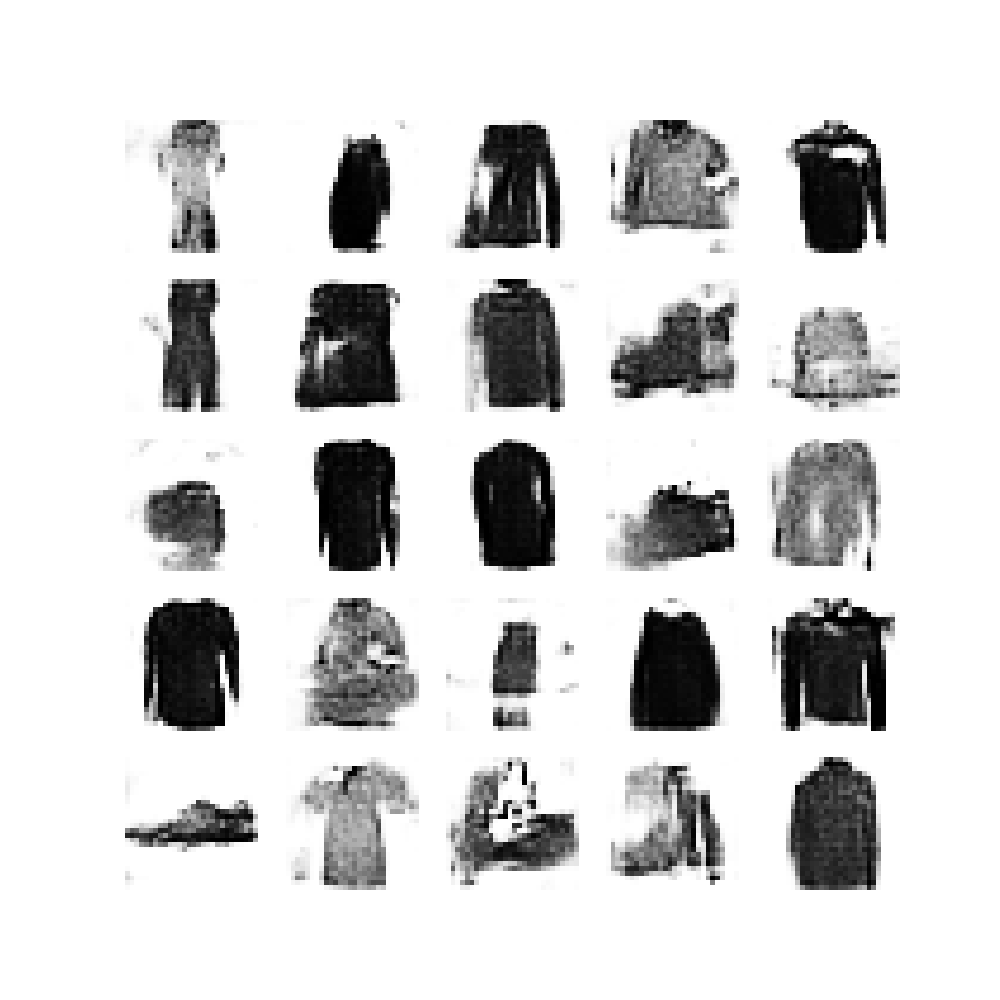

In [50]:
## Source: https://www.tensorflow.org/tutorials/generative/dcgan#create_a_gif
import imageio
import glob

anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

import IPython
display.Image(filename=anim_file)